In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/train.csv')
pd.set_option('display.max_rows', None)

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
nan_count = df.isna().sum().sort_values(ascending=False)
print(nan_count)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

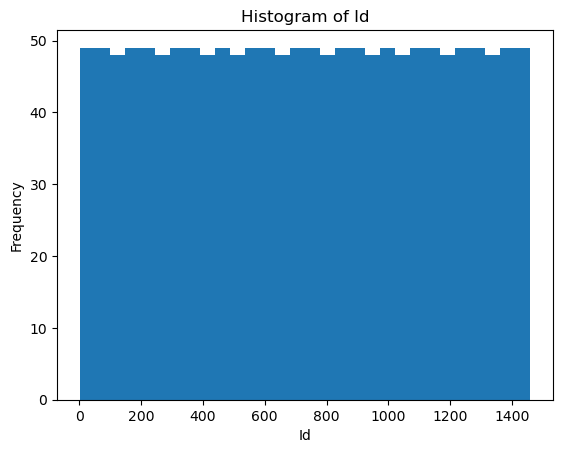

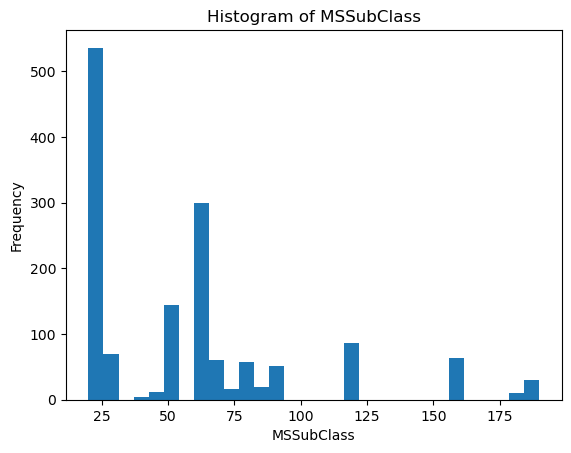

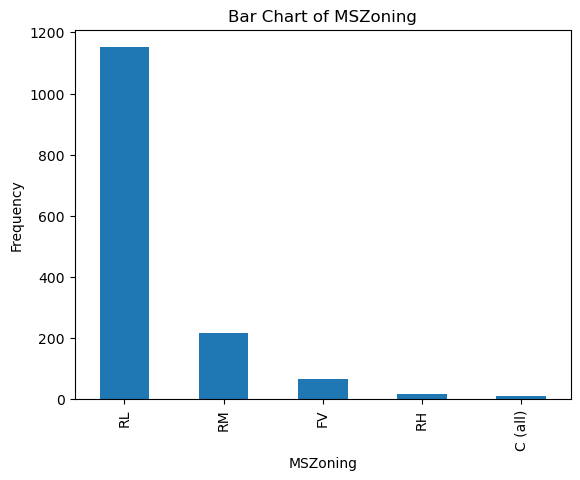

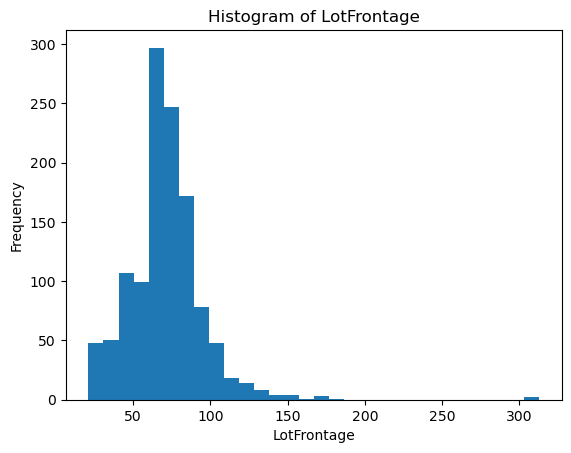

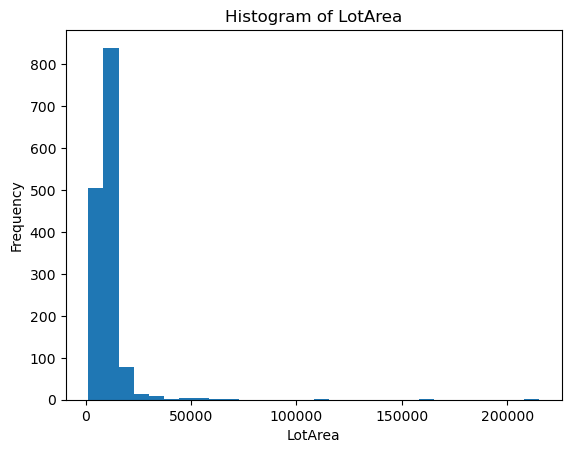

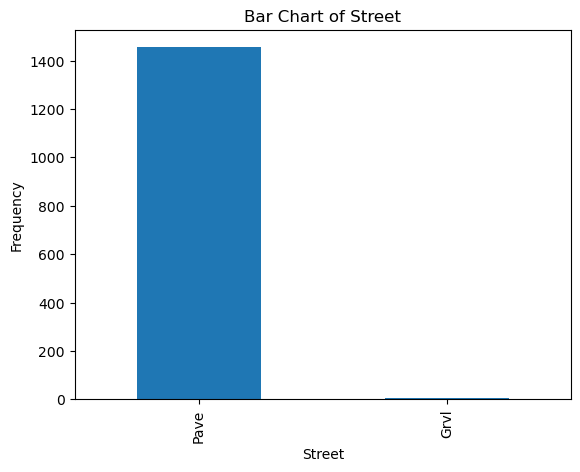

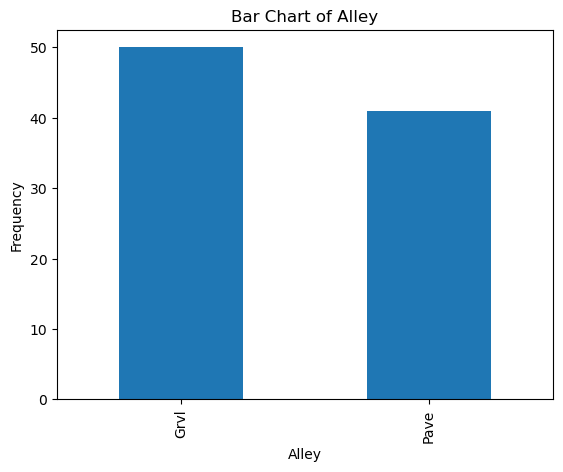

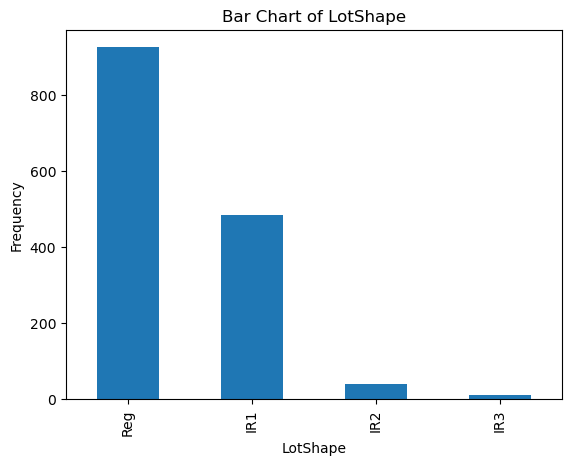

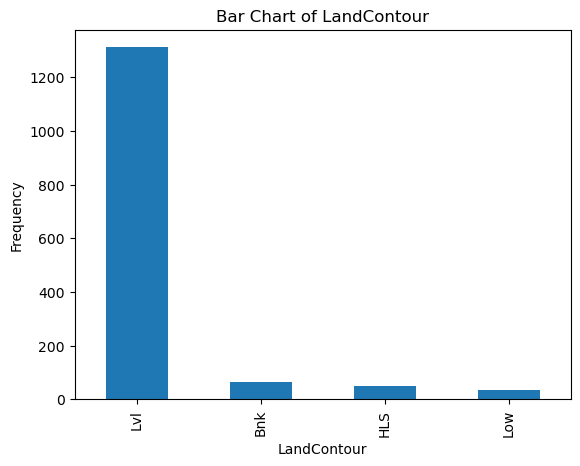

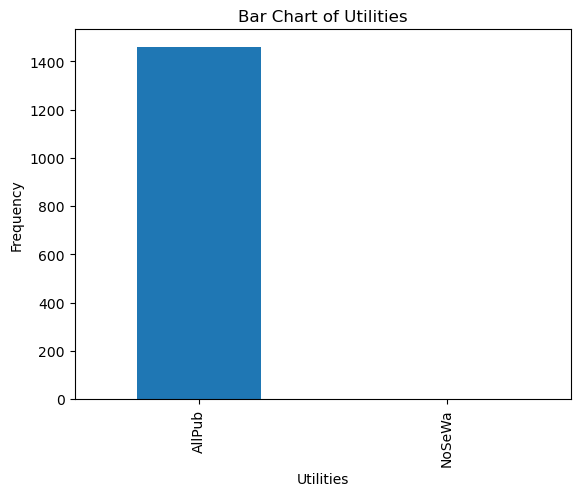

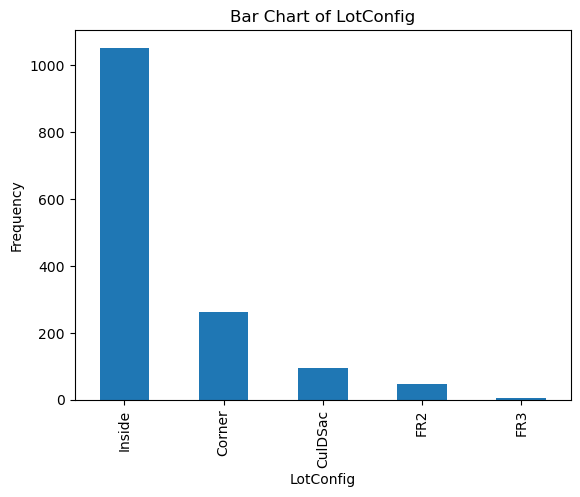

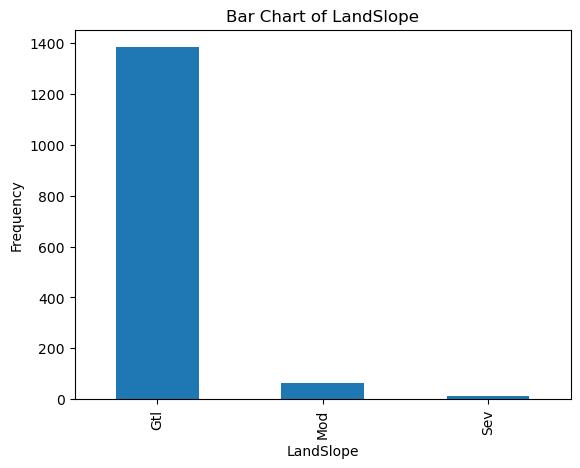

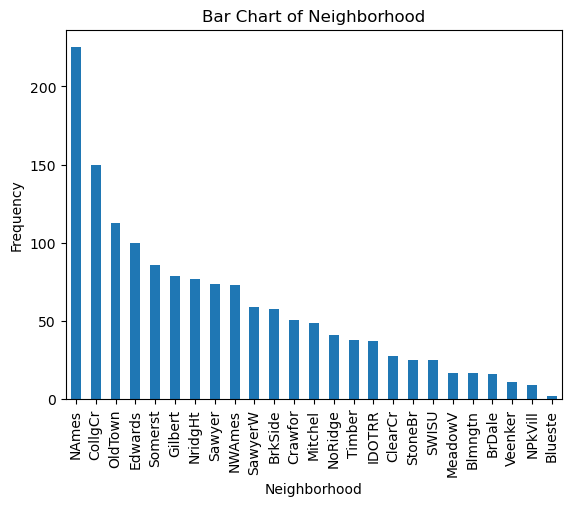

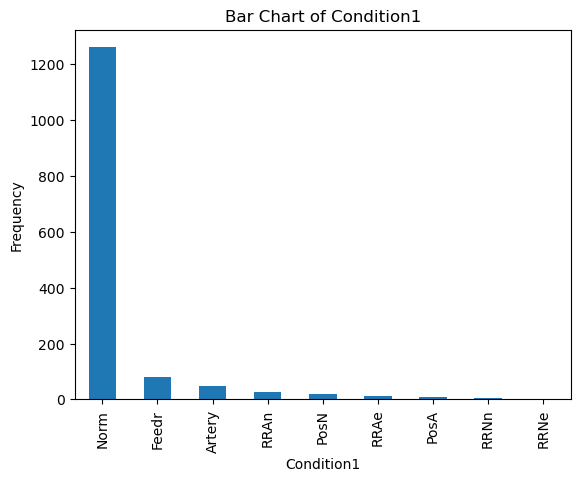

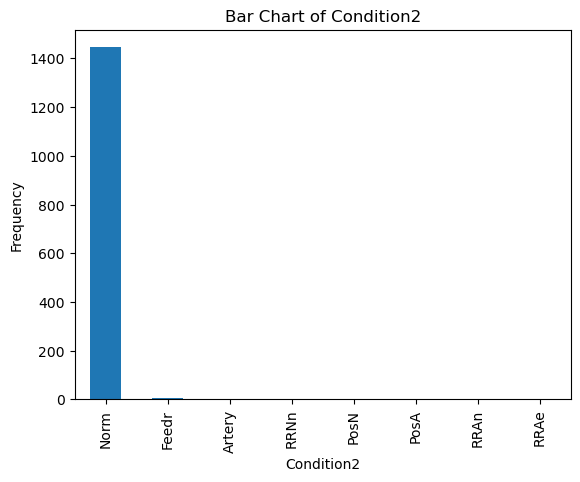

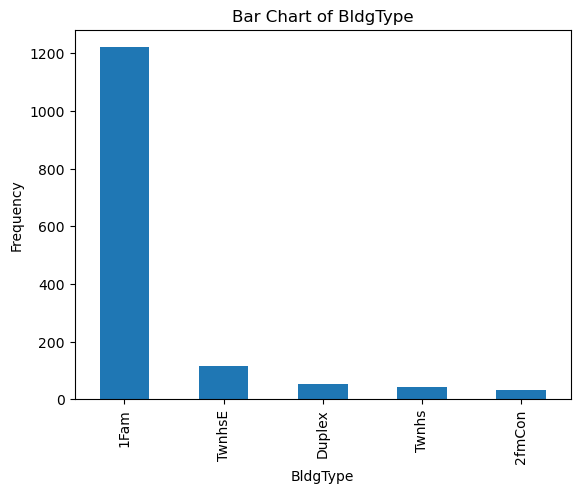

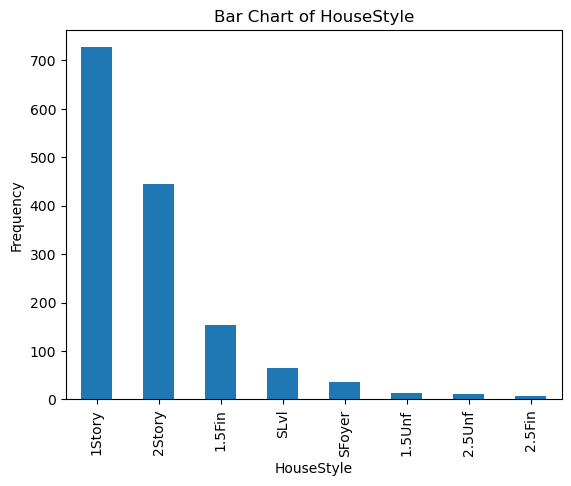

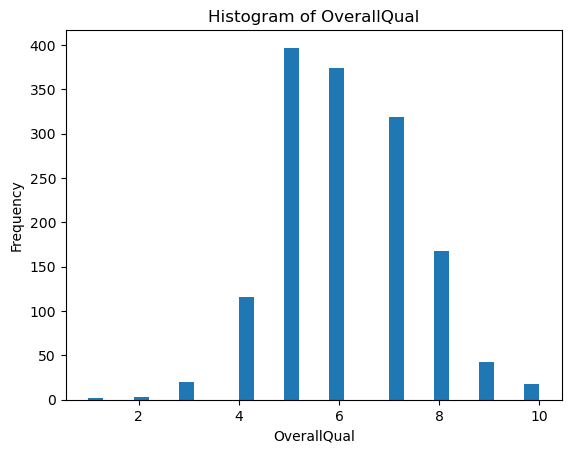

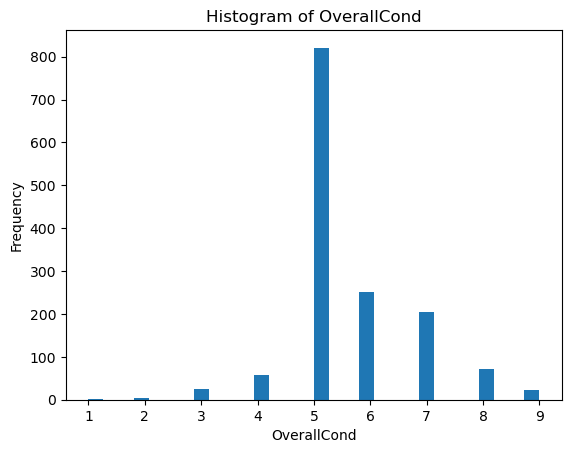

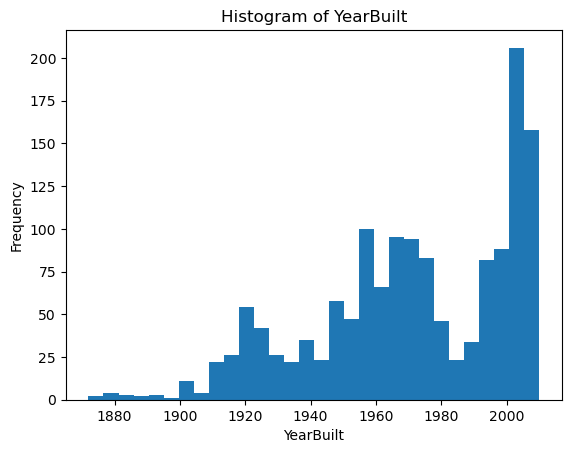

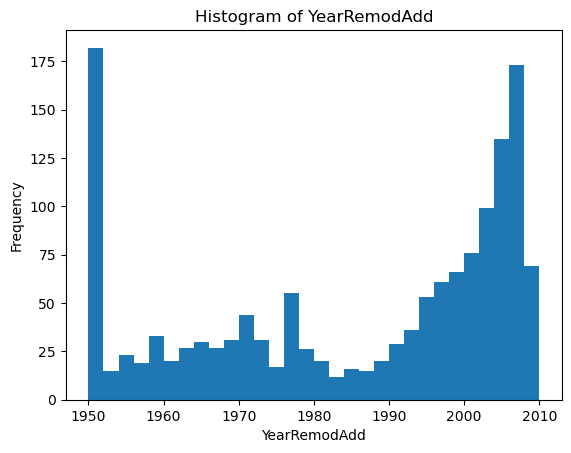

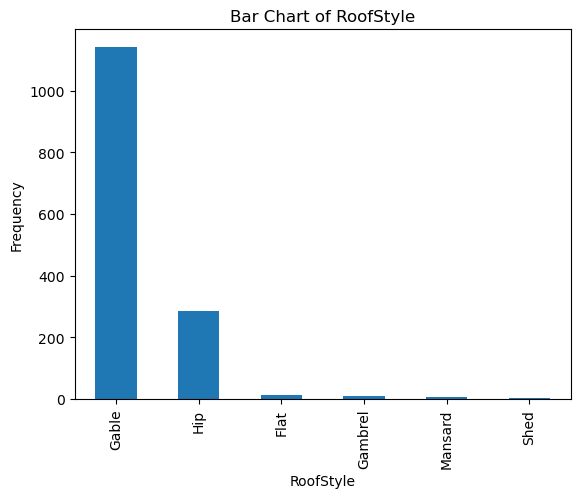

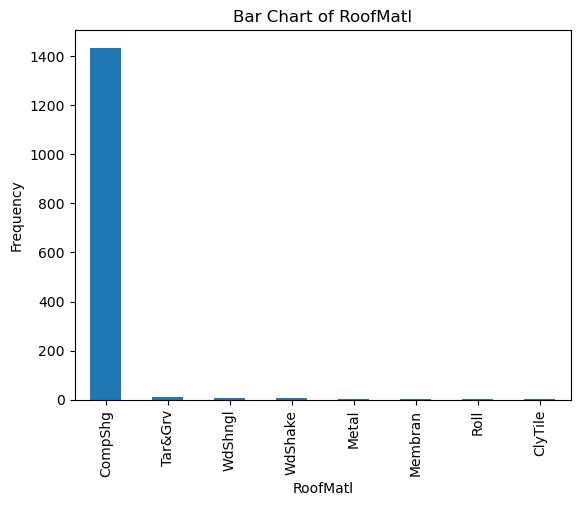

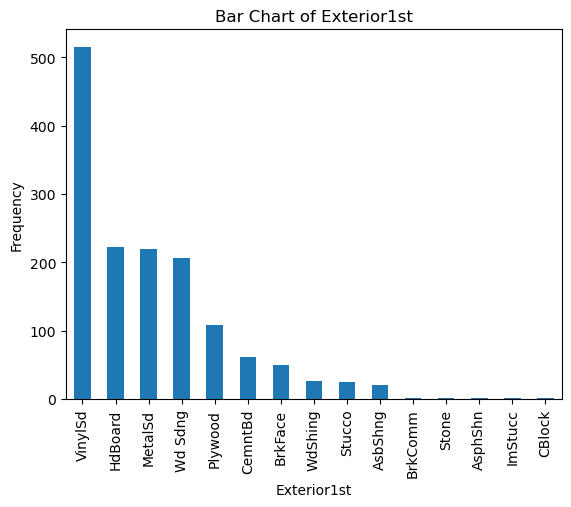

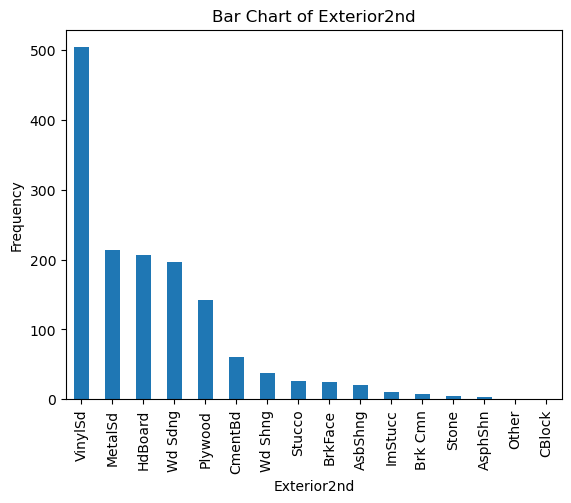

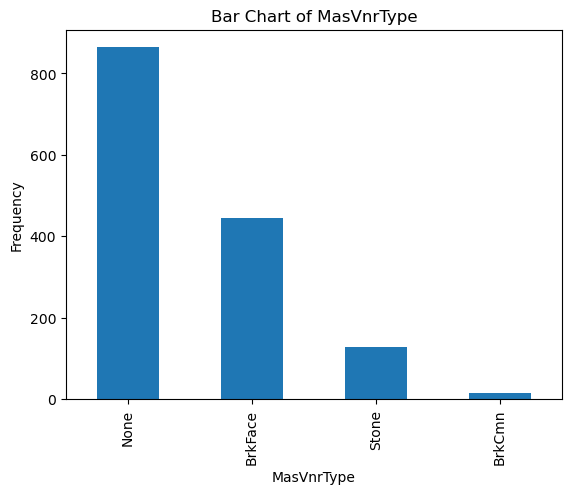

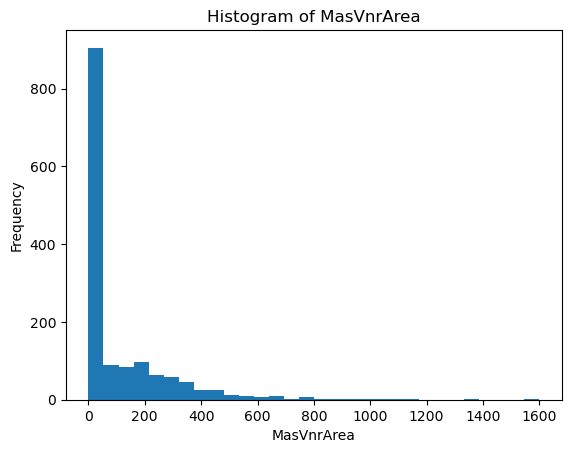

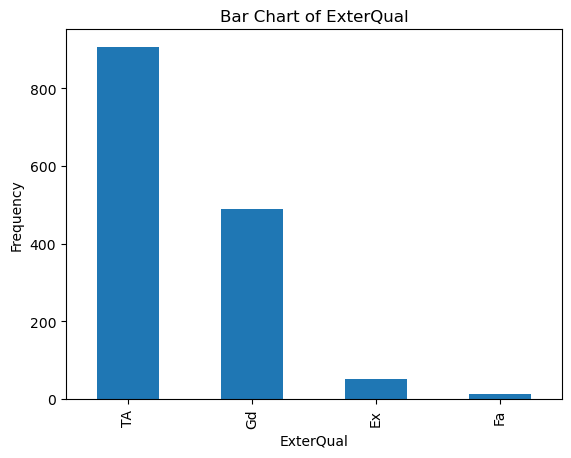

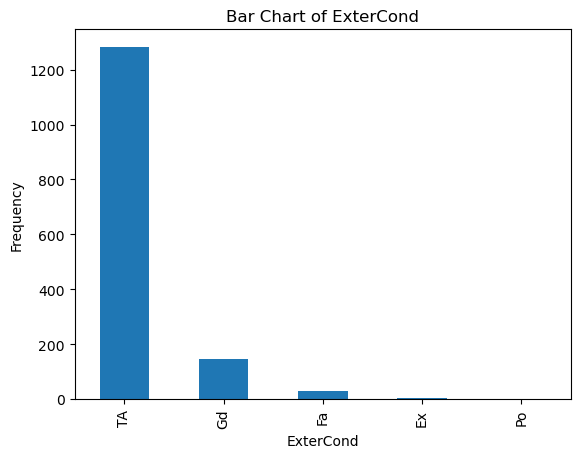

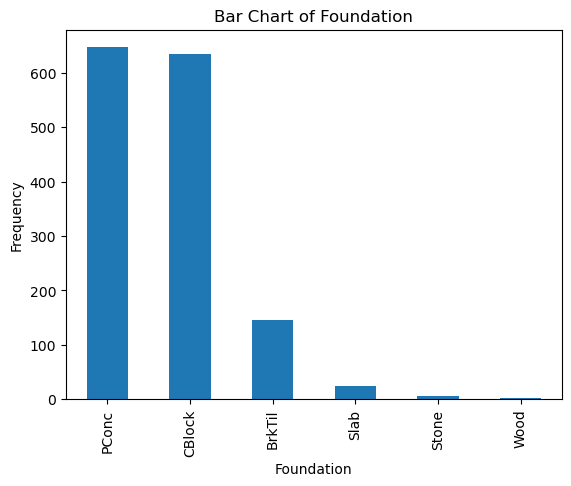

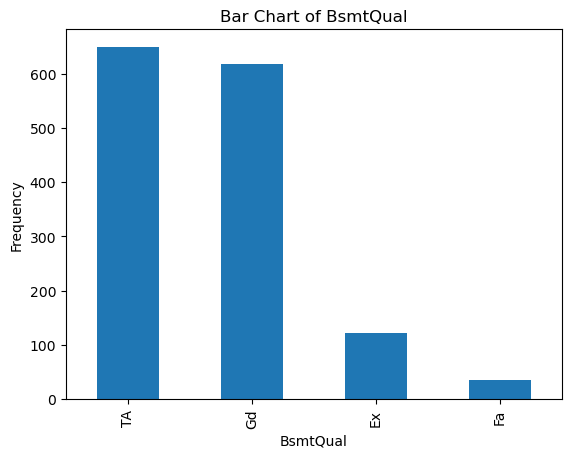

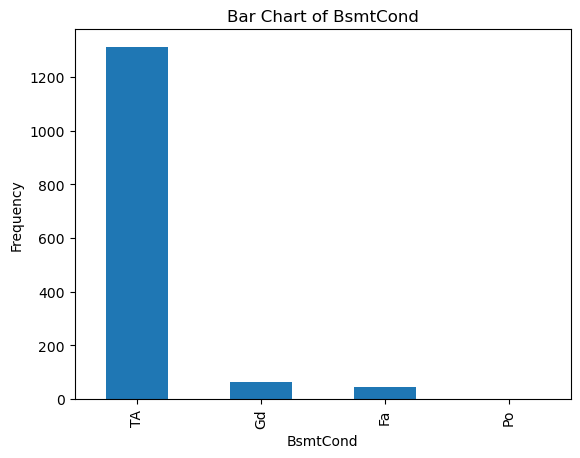

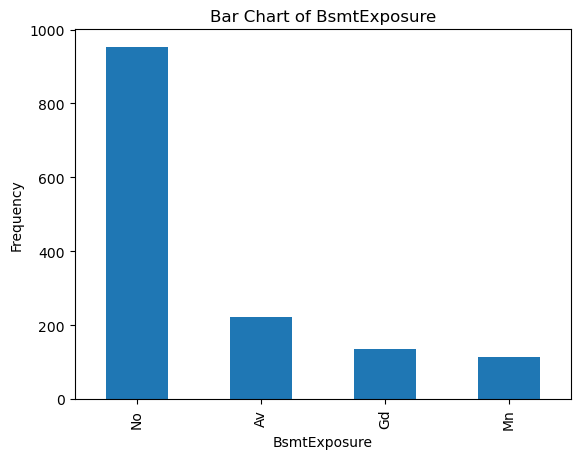

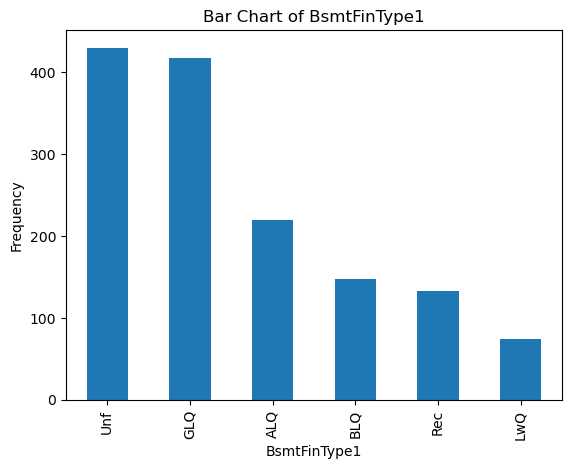

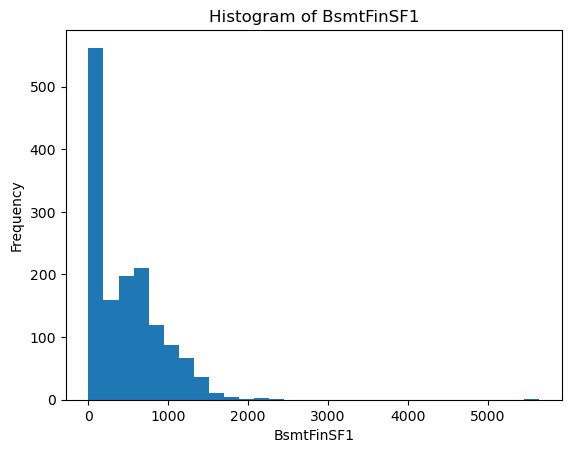

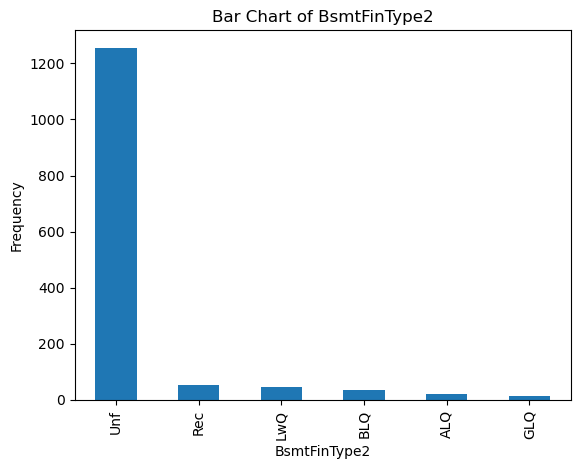

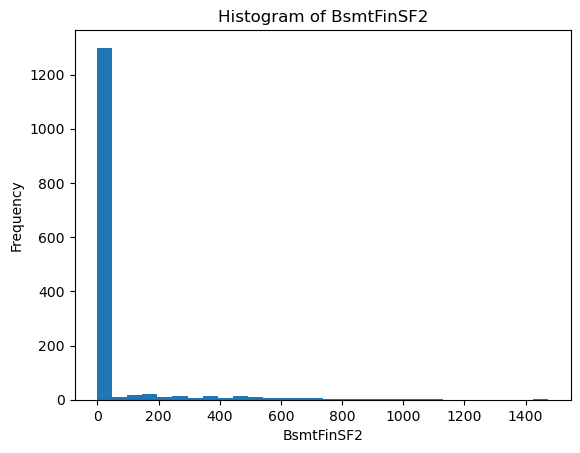

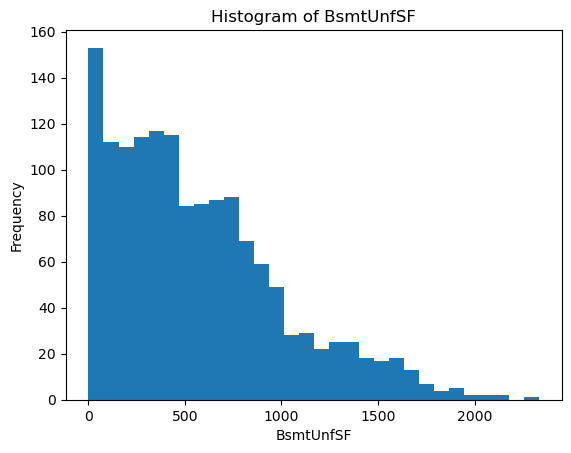

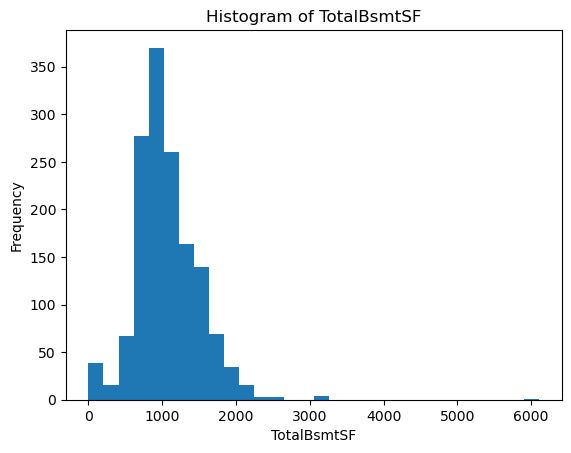

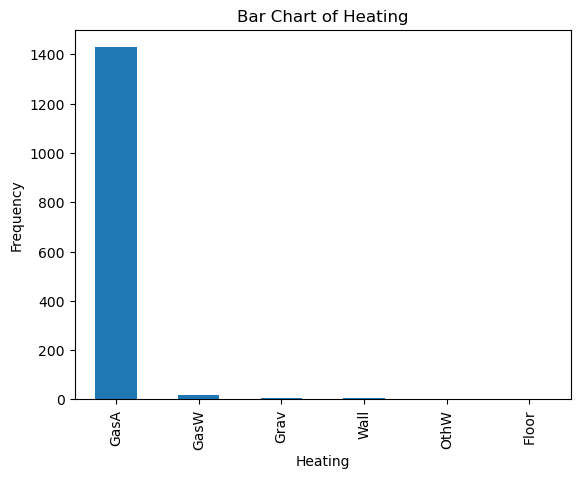

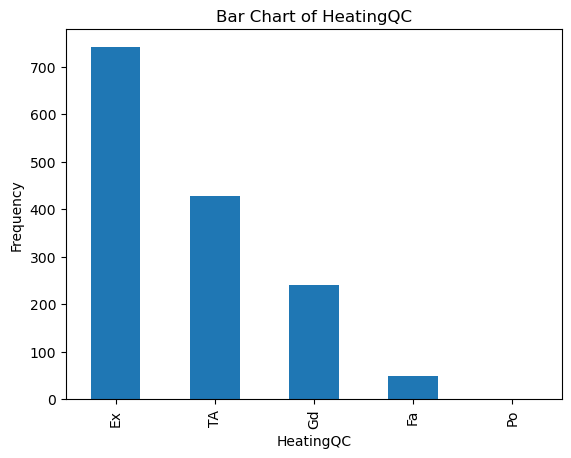

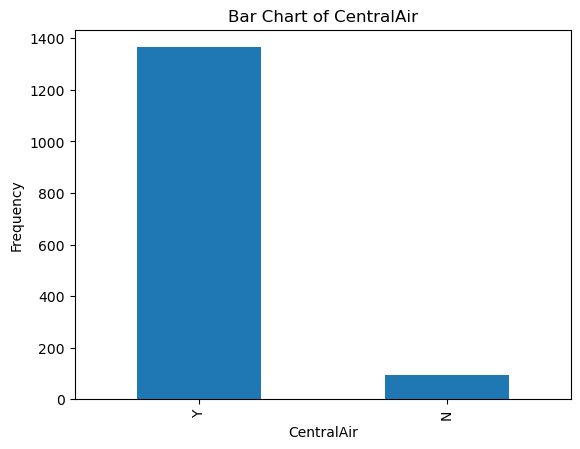

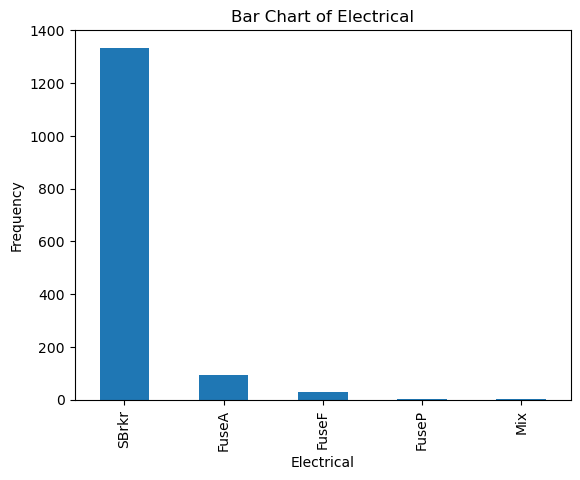

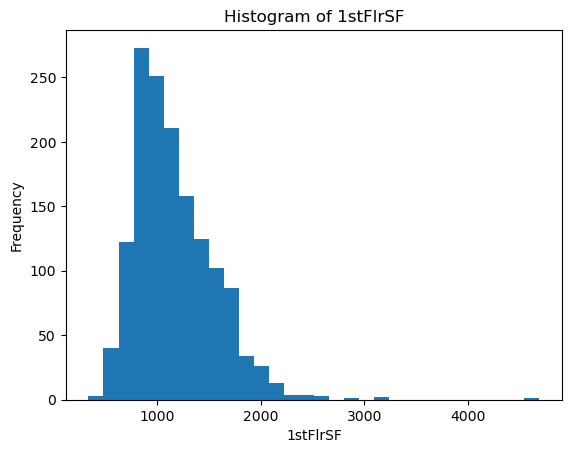

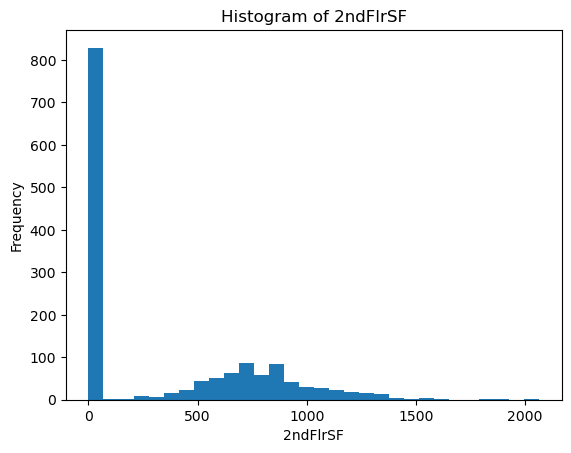

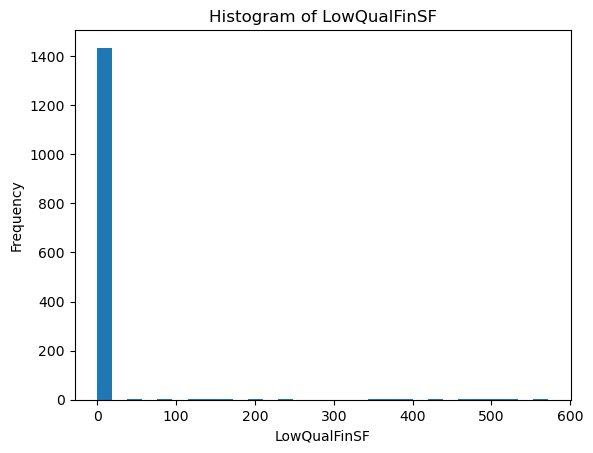

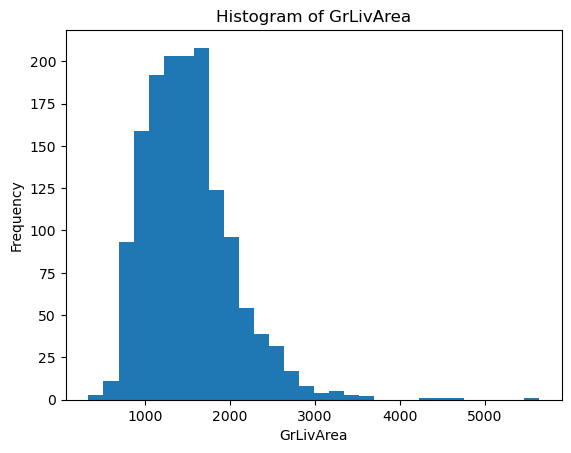

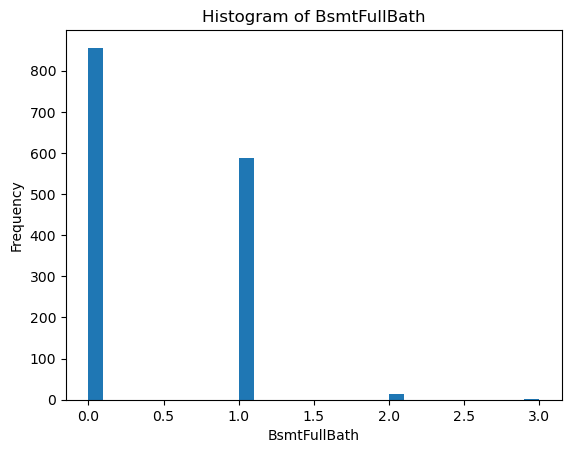

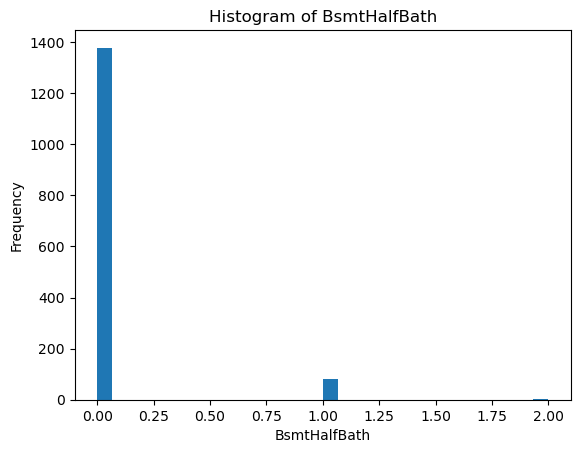

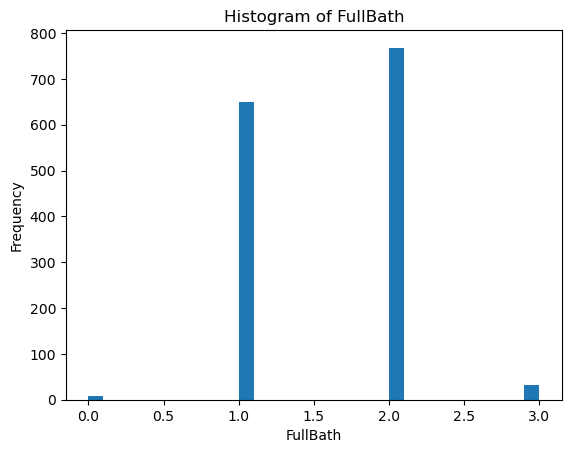

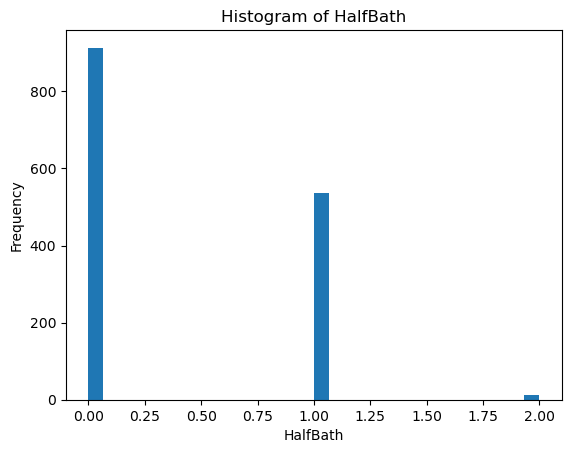

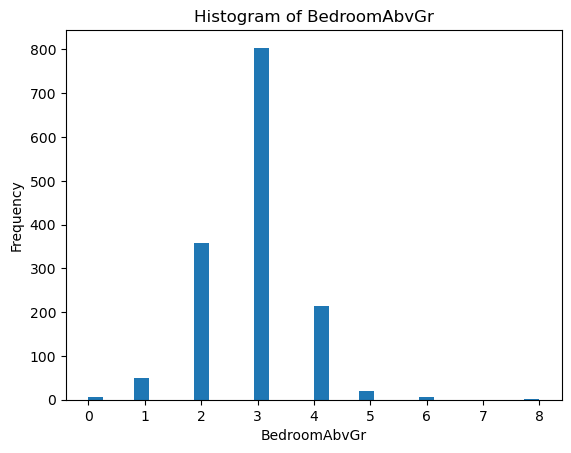

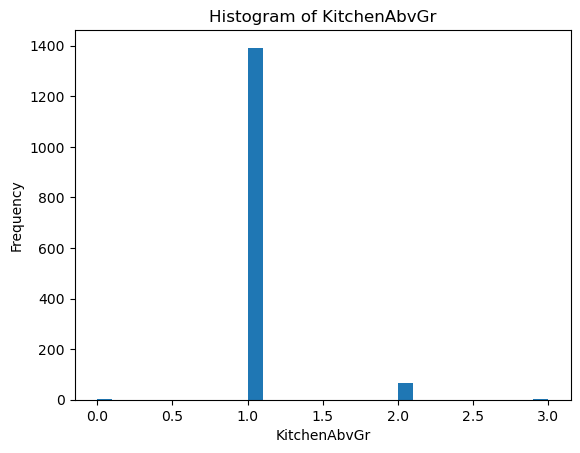

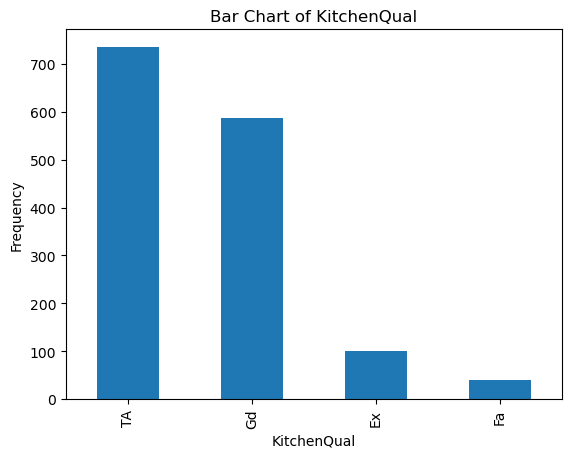

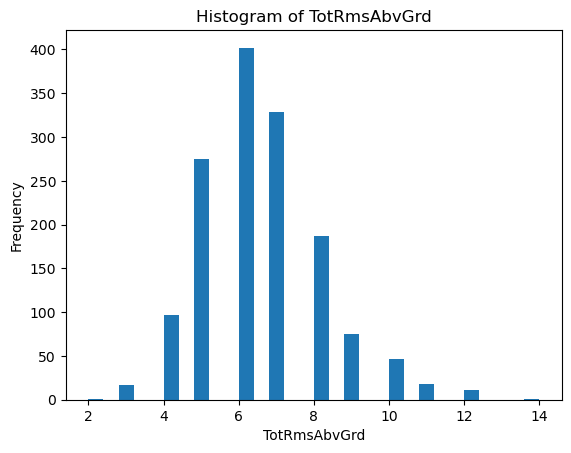

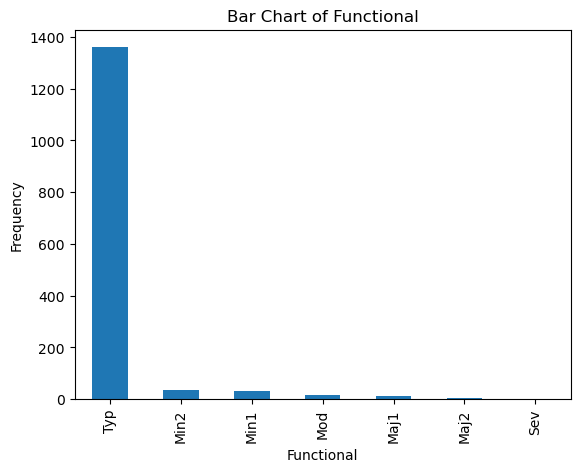

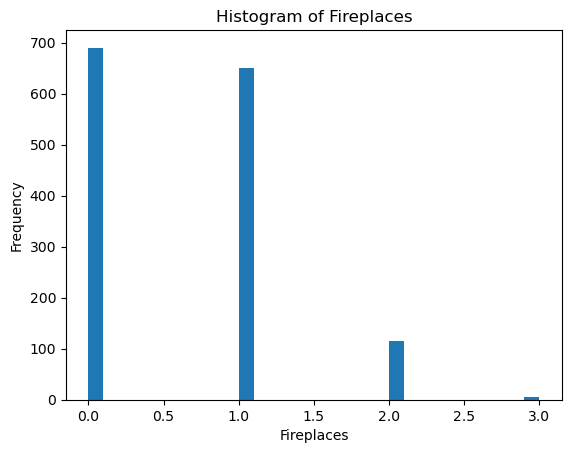

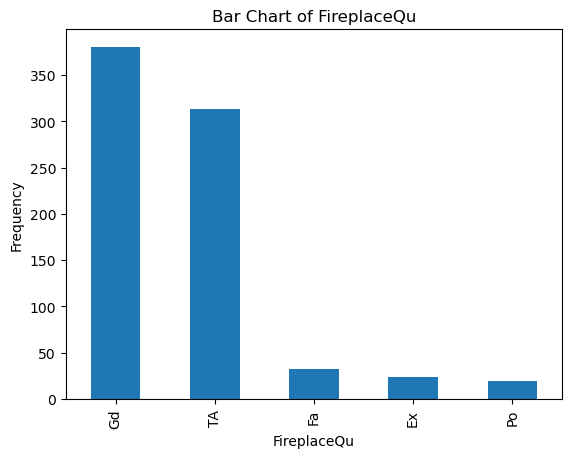

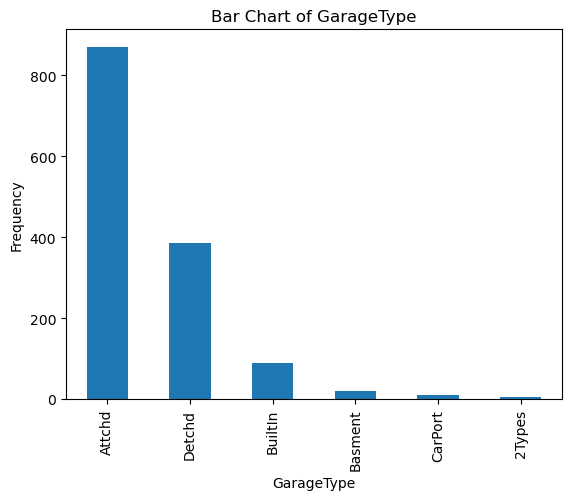

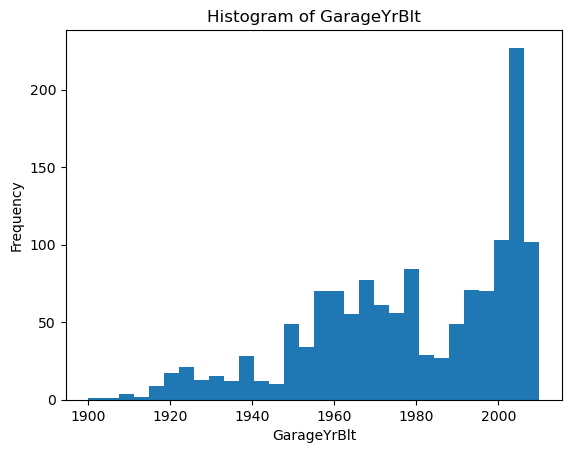

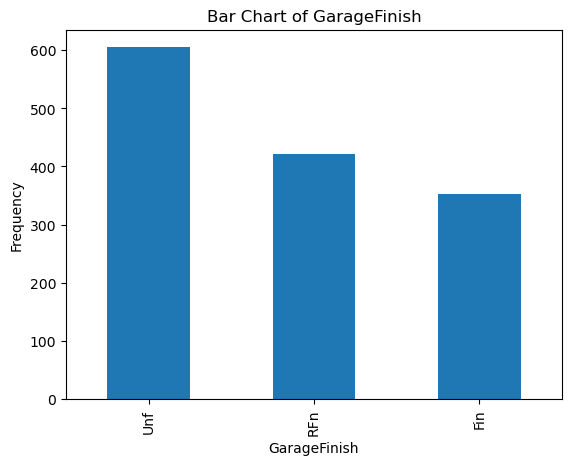

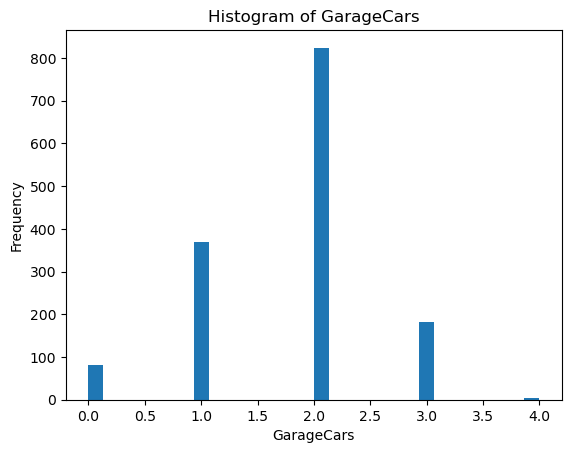

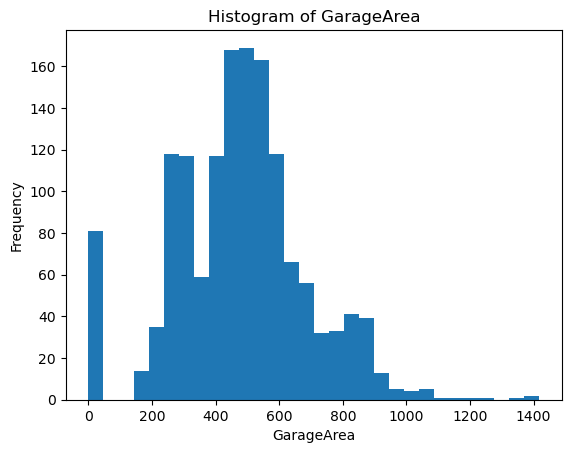

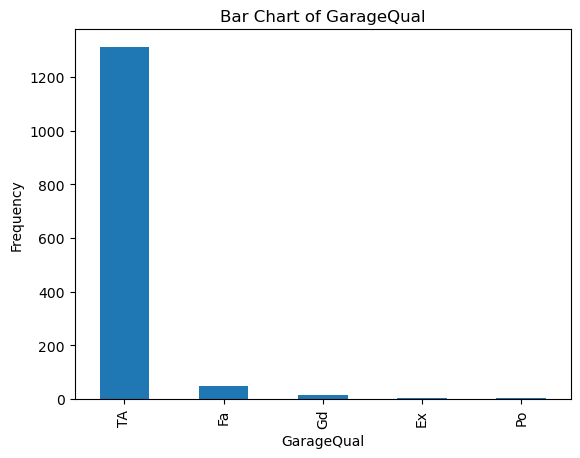

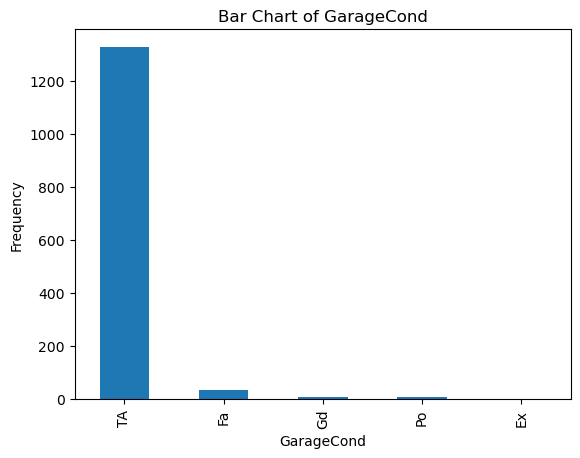

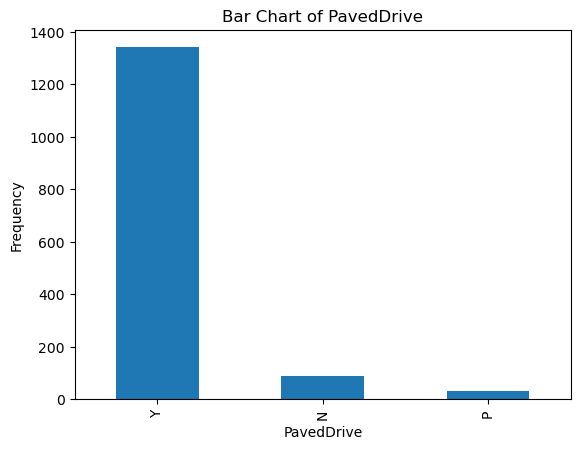

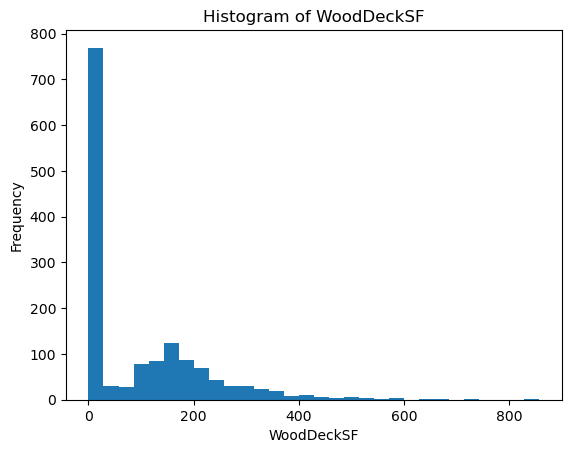

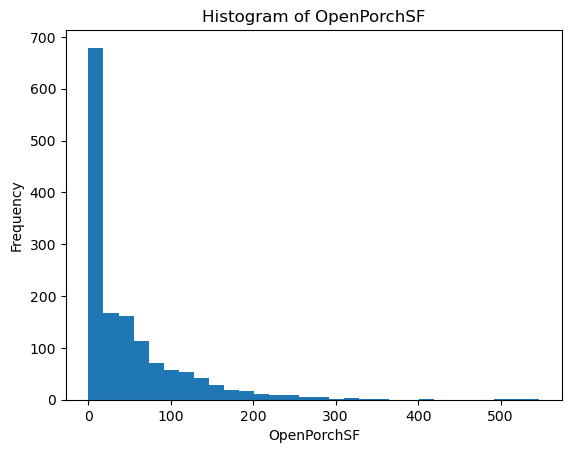

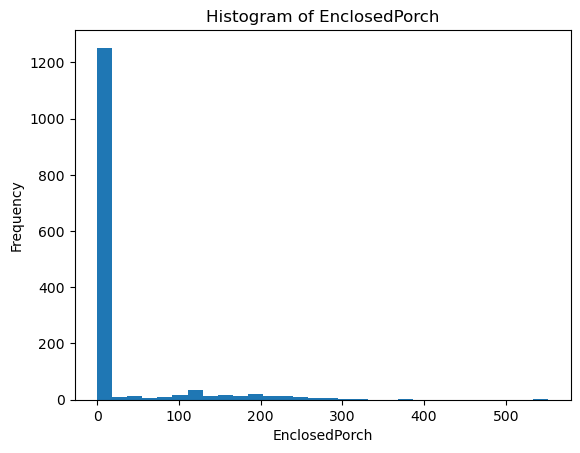

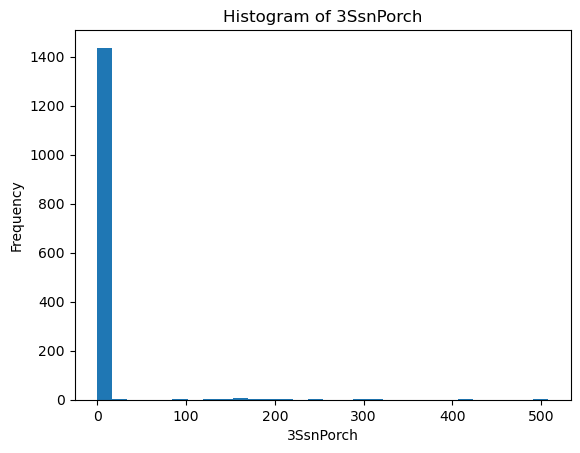

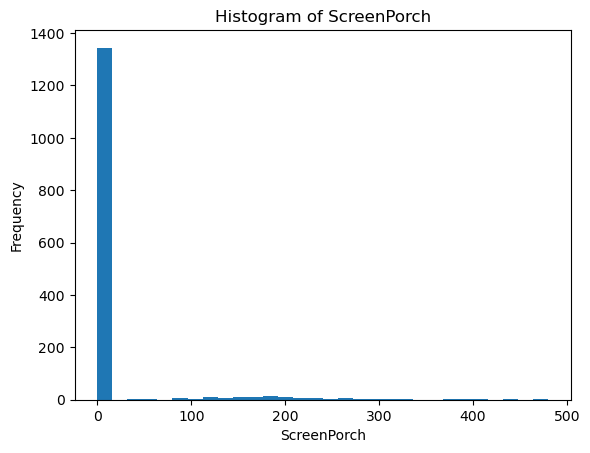

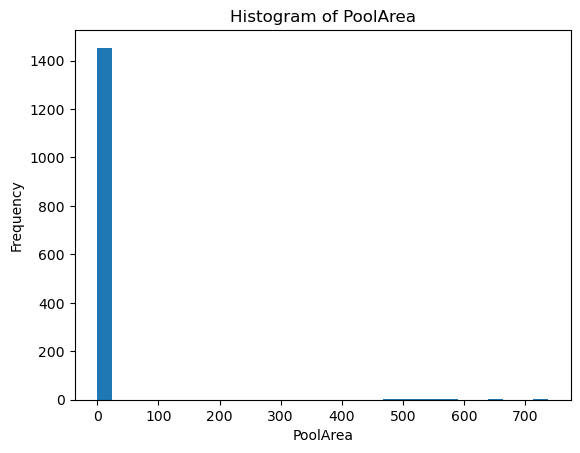

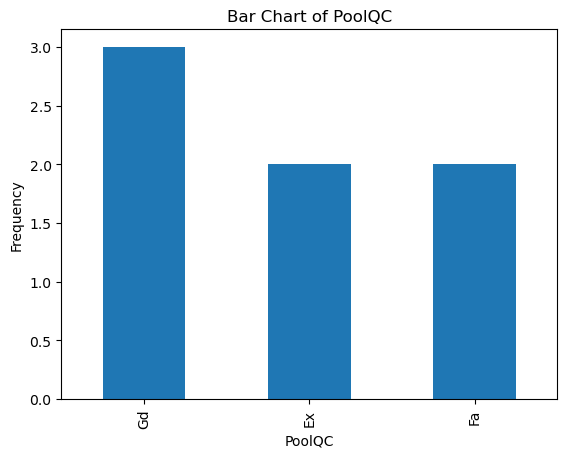

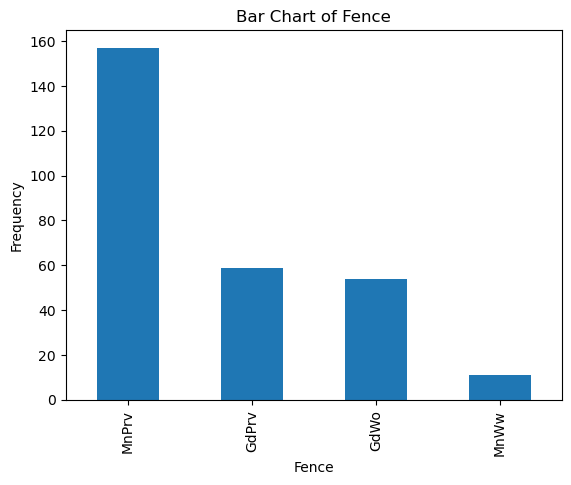

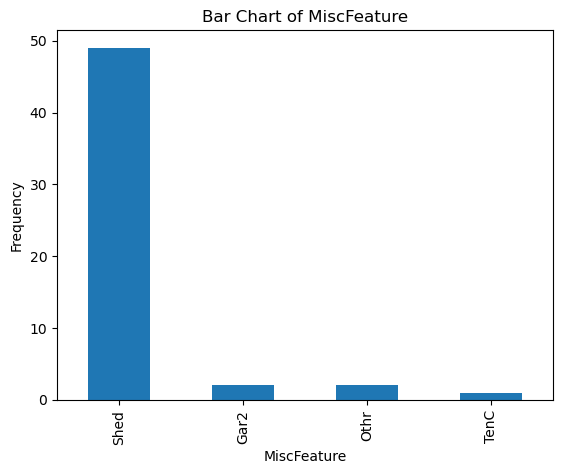

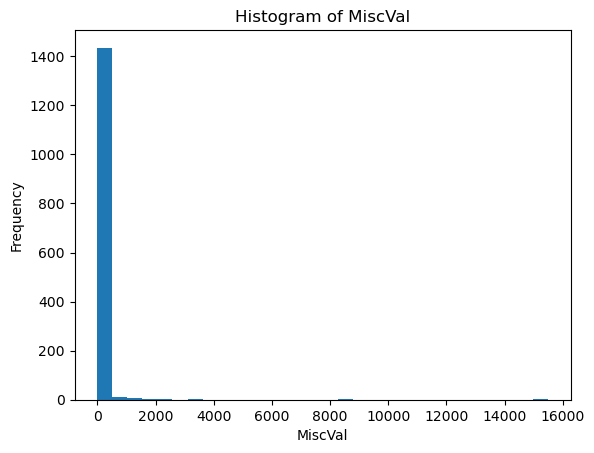

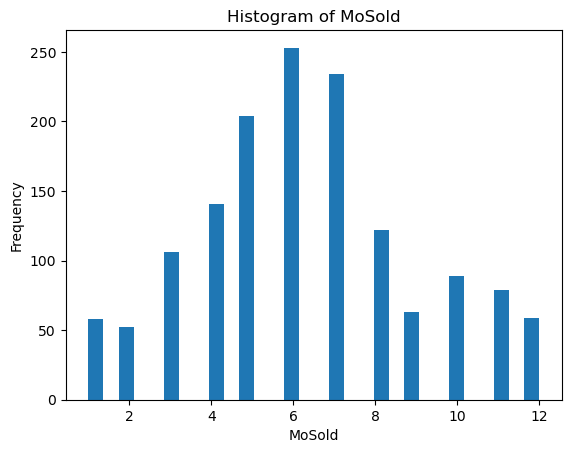

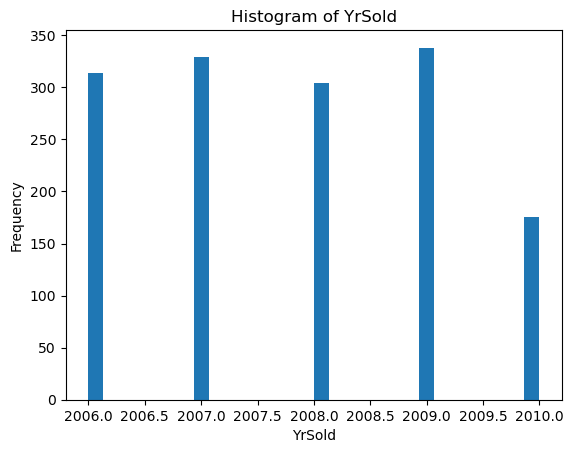

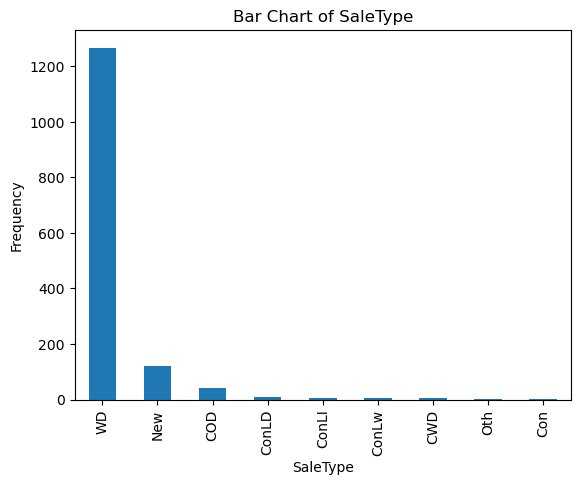

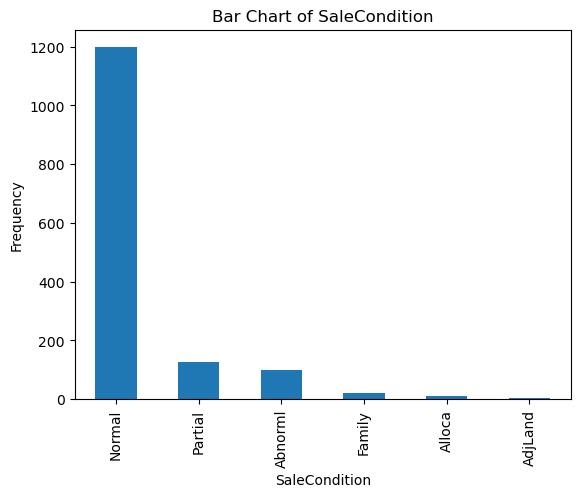

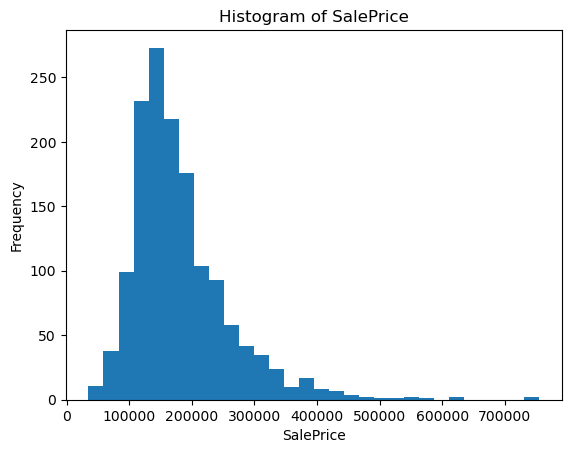

In [7]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].plot(kind='hist', bins=30)
        plt.title(f'Histogram of {column}')
    elif pd.api.types.is_string_dtype(df[column]):
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Chart of {column}')
    else:
        continue

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

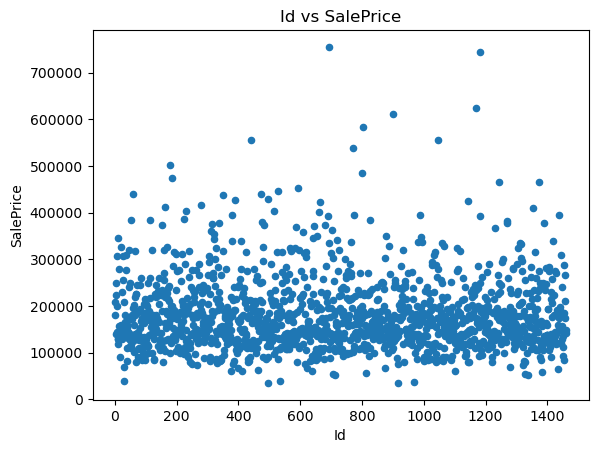

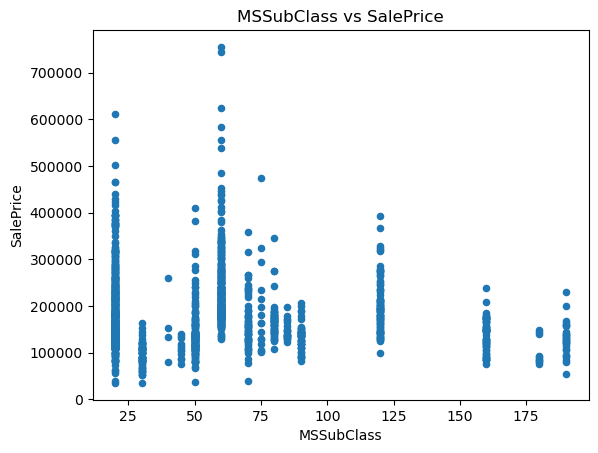

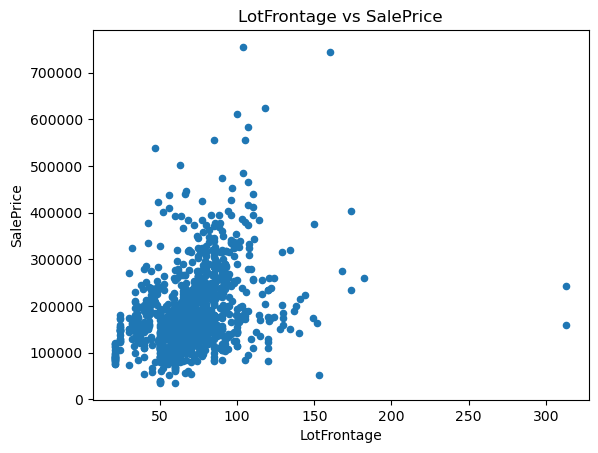

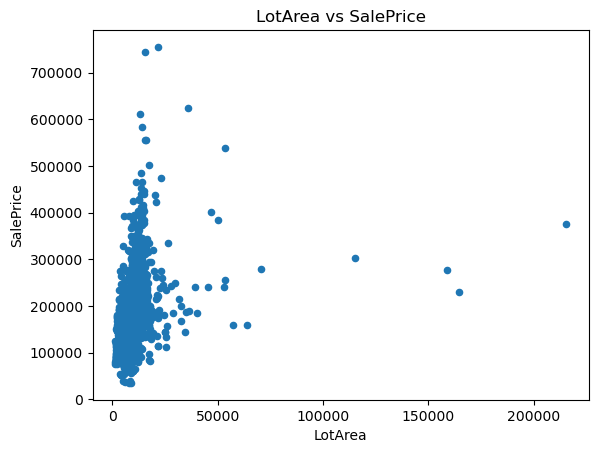

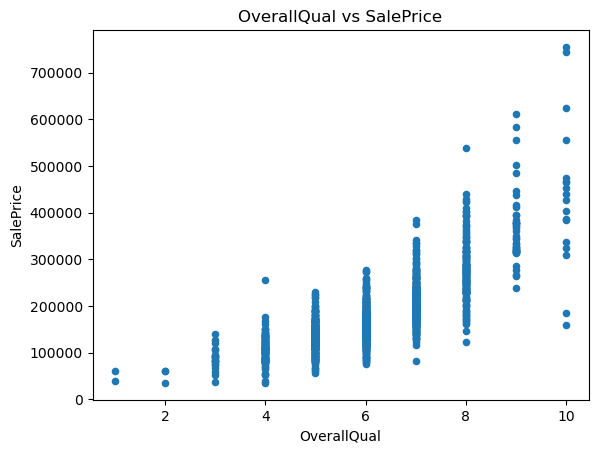

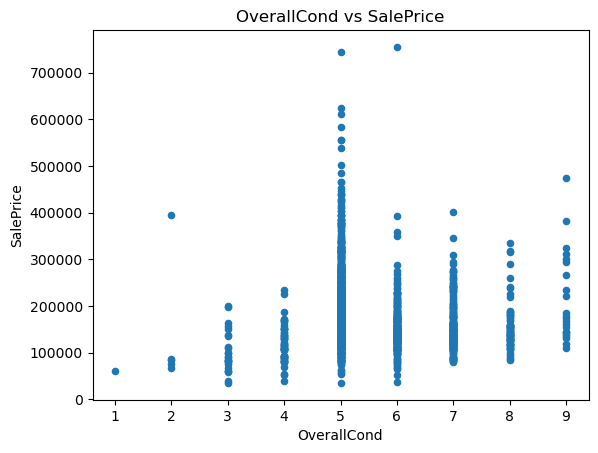

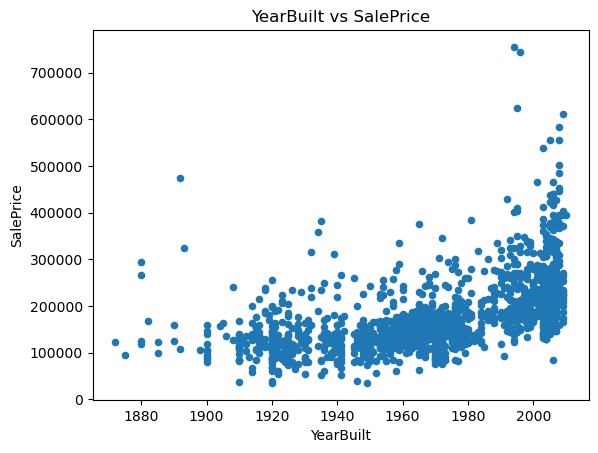

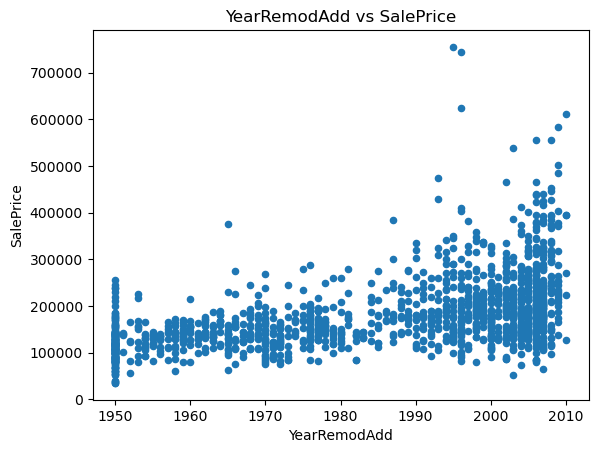

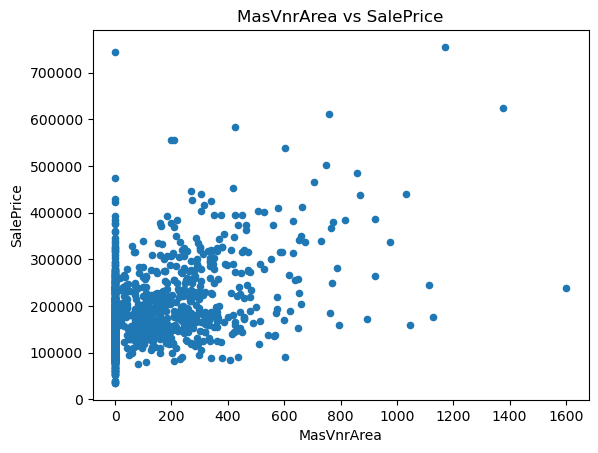

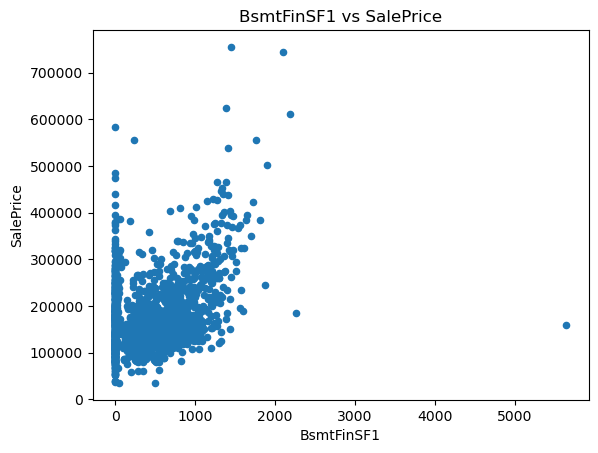

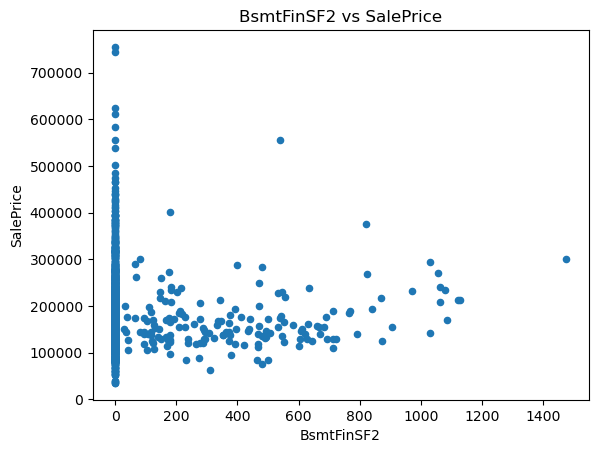

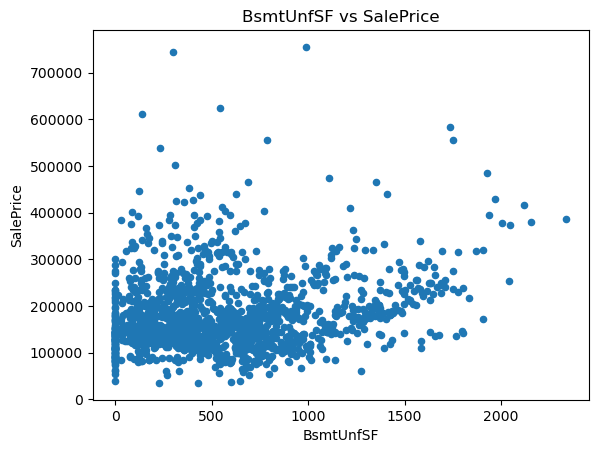

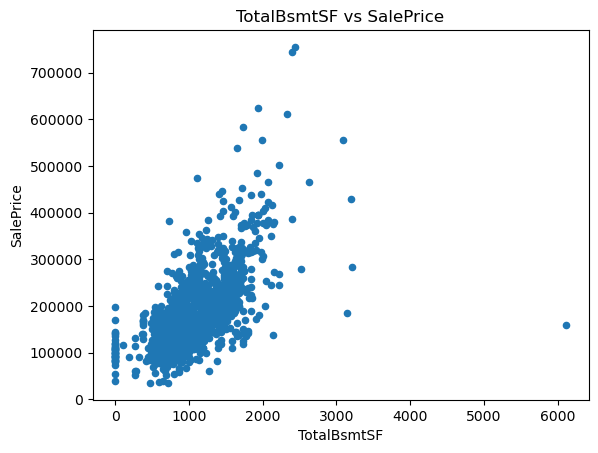

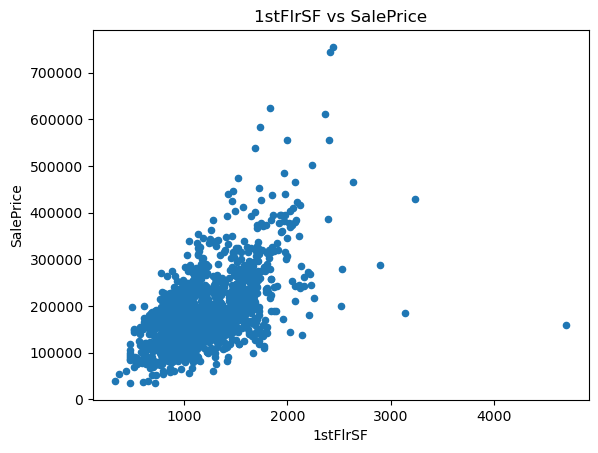

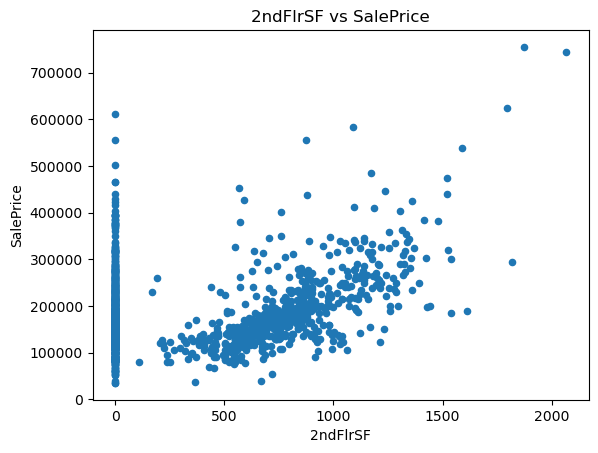

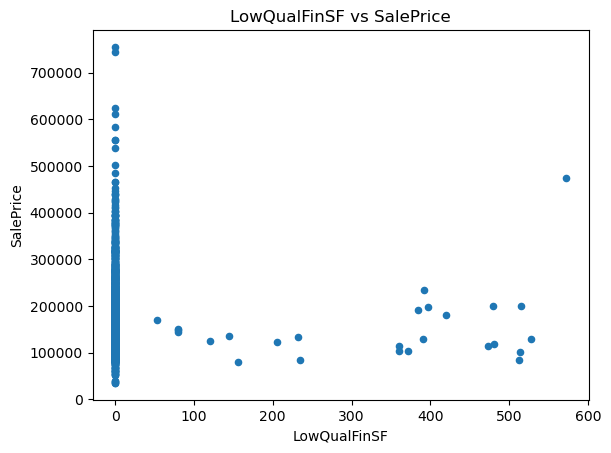

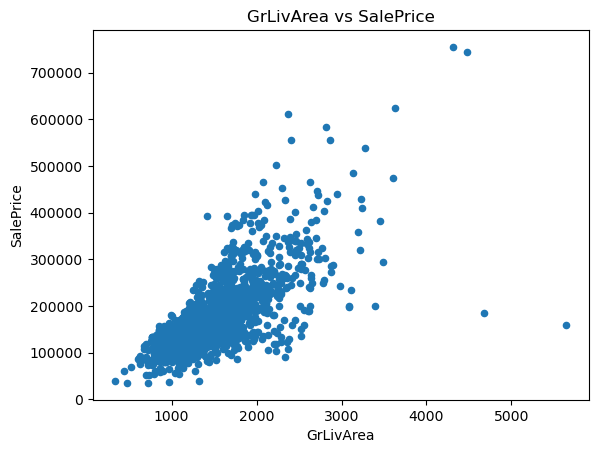

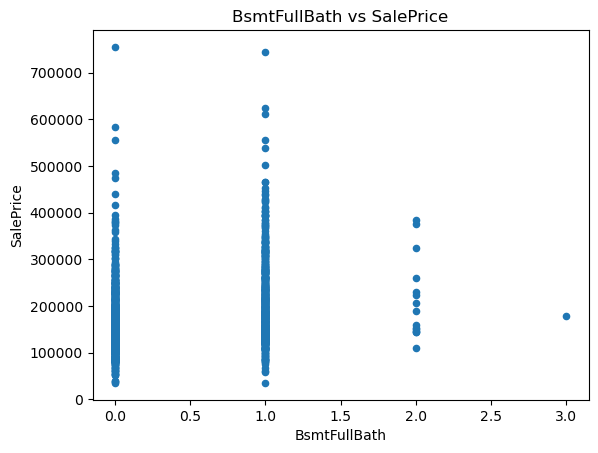

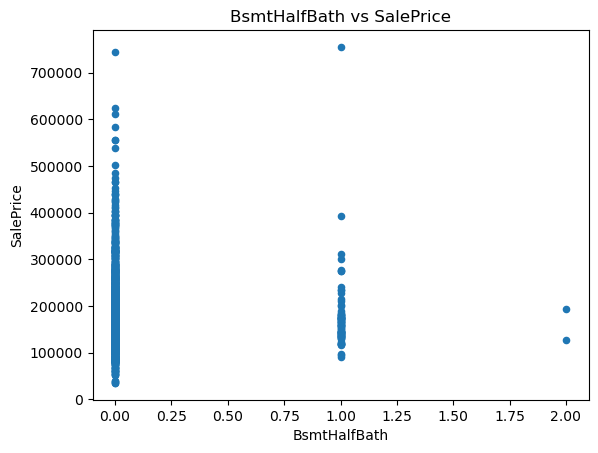

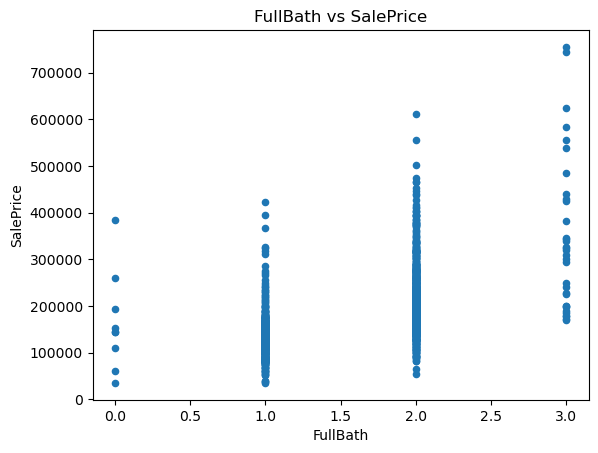

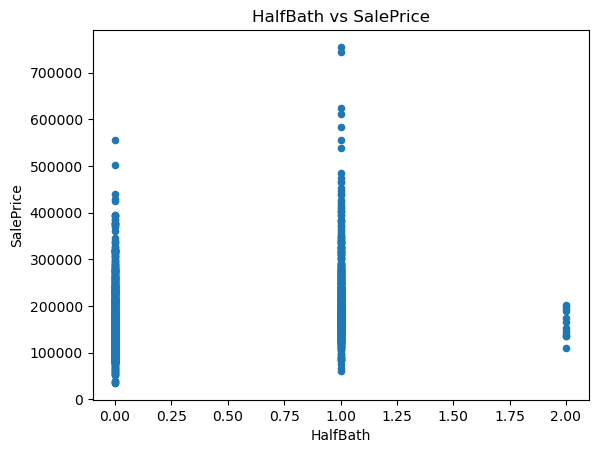

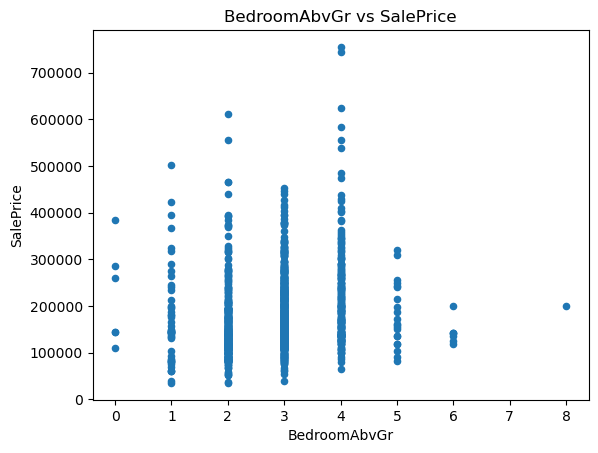

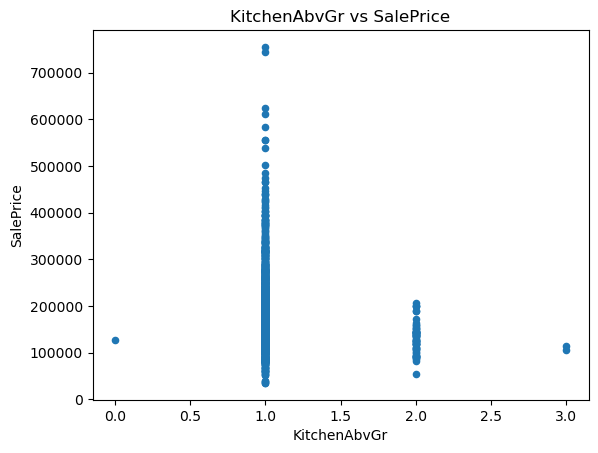

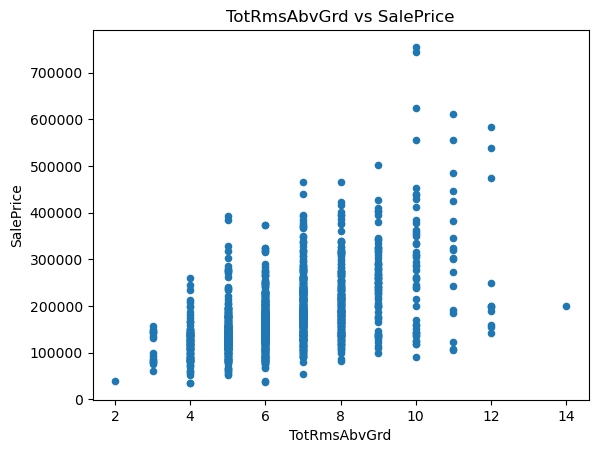

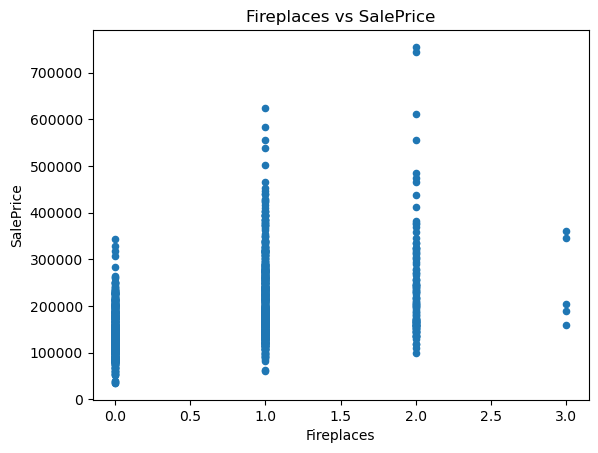

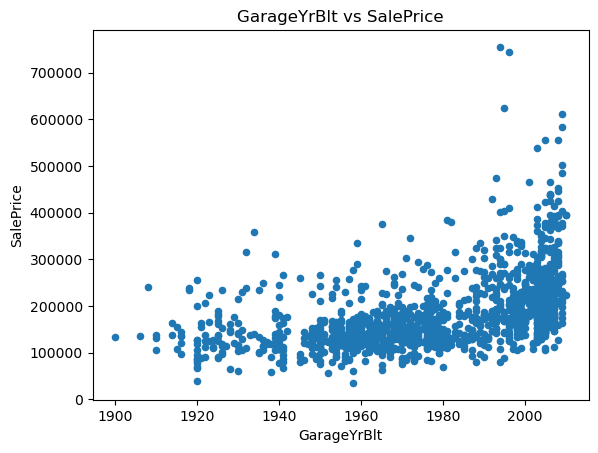

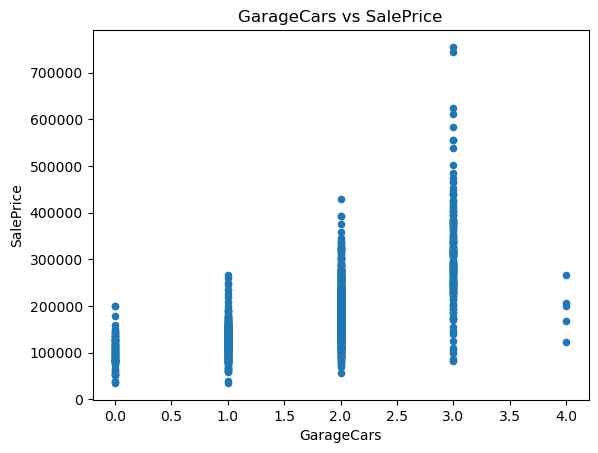

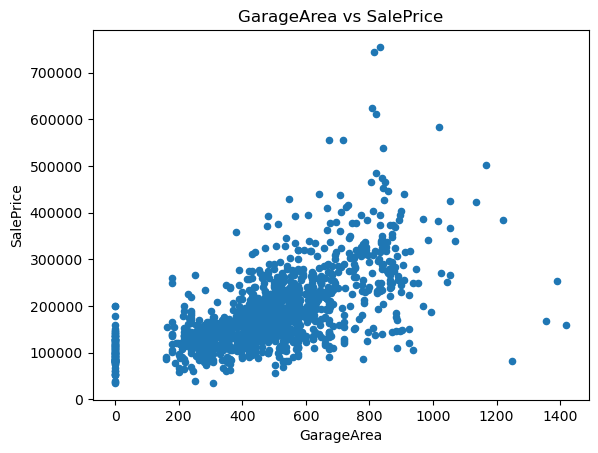

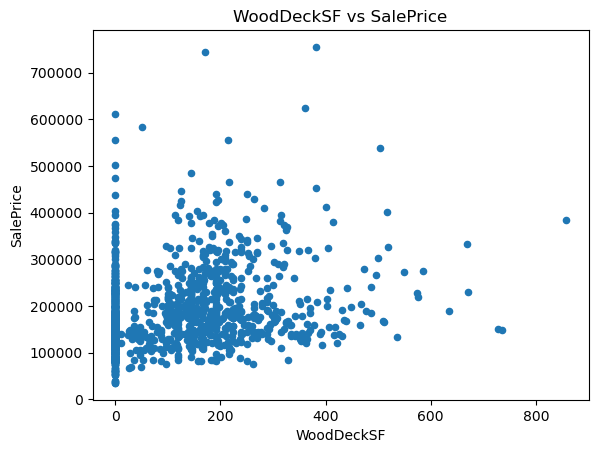

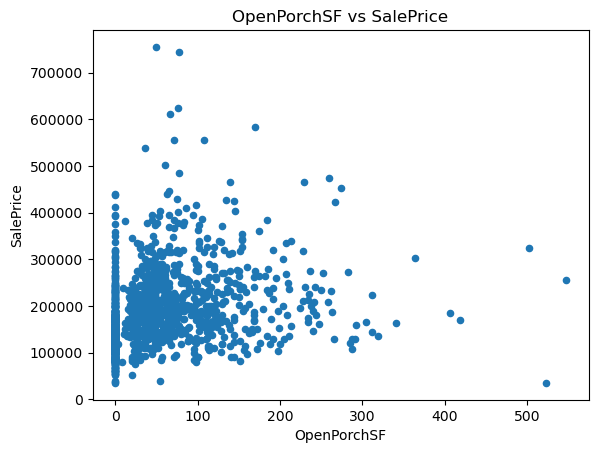

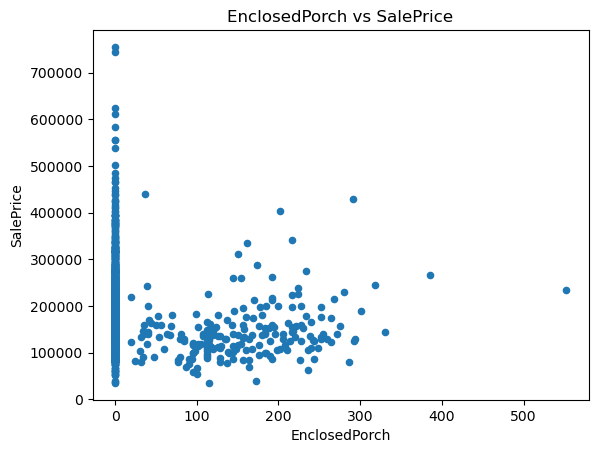

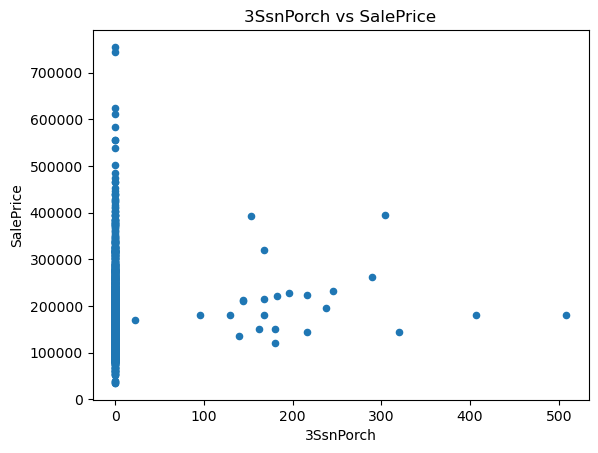

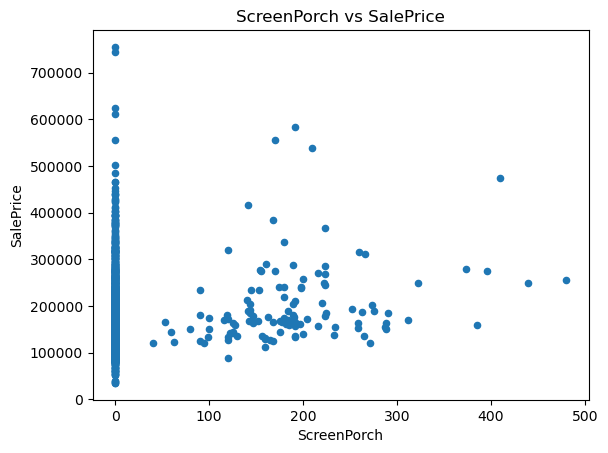

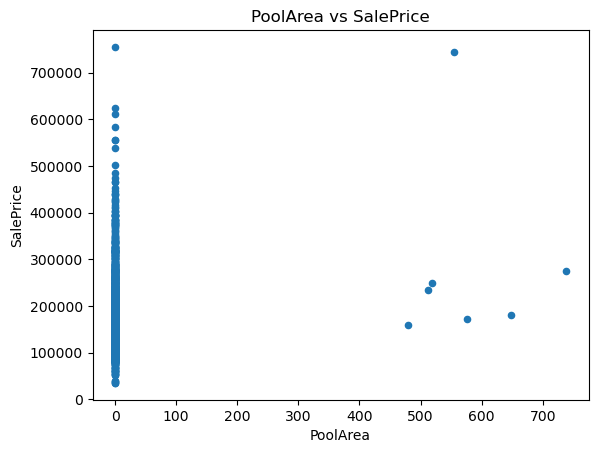

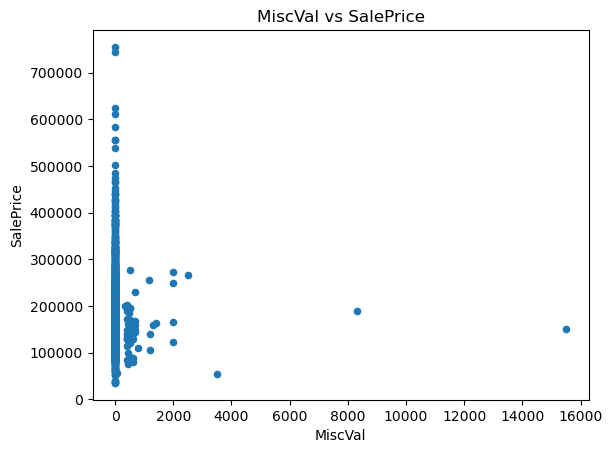

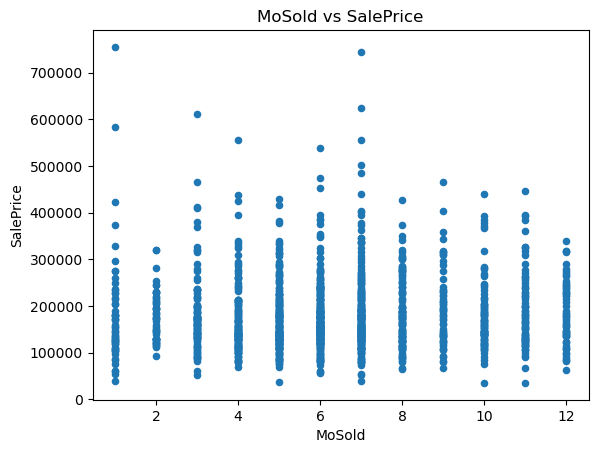

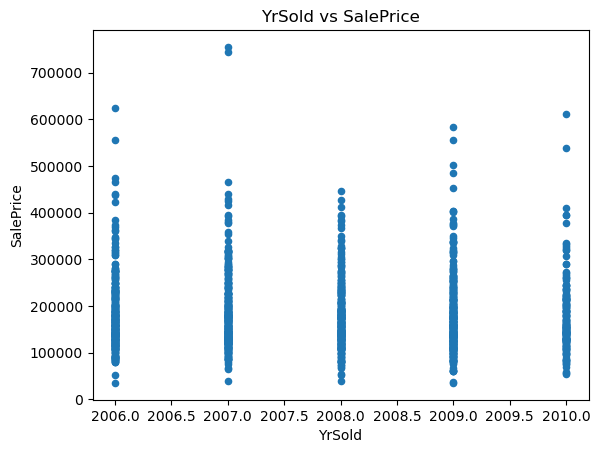

In [8]:
for column in df.columns:
    if column == 'SalePrice':
        continue

    if pd.api.types.is_numeric_dtype(df[column]):
        df.plot(kind='scatter', x=column, y='SalePrice')
        plt.title(f'{column} vs SalePrice')
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.show()

In [9]:
import pandas as pd

def print_high_correlations(df, threshold):
    """
    Print unique pairs of variables in the DataFrame 'df' whose absolute correlation
    is above the specified 'threshold'. Exclude columns that contain string values 
    and columns that are of dtype 'object'. Avoid printing duplicates.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Exclude columns with any string values and dtype 'object'
    for col in df_copy.columns:
        if df_copy[col].apply(lambda x: isinstance(x, str)).any() or df_copy[col].dtype == 'object':
            df_copy = df_copy.drop(col, axis=1)

    # Calculate correlation matrix
    correlation_matrix = df_copy.corr()

    # Iterate over the correlation matrix and print high correlations without duplicates
    for i, col1 in enumerate(correlation_matrix.columns):
        for j, col2 in enumerate(correlation_matrix.columns):
            if i < j:  # Ensure col1 comes before col2 in the DataFrame
                correlation = correlation_matrix.loc[col1, col2]
                if abs(correlation) > threshold:
                    print(f"Correlation between {col1} and {col2}: {correlation:.2f}")

def print_correlation_to_saleprice(df):
    """
    Print the correlation of each numeric variable in the DataFrame 'df' with the column 'SalePrice',
    sorted from highest to lowest, excluding string values and columns of dtype 'object'.
    """
    if 'SalePrice' not in df.columns:
        print("The DataFrame does not contain a 'SalePrice' column.")
        return

    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Exclude columns with any string values and dtype 'object'
    for col in df_copy.columns:
        if df_copy[col].apply(lambda x: isinstance(x, str)).any() or df_copy[col].dtype == 'object':
            df_copy = df_copy.drop(col, axis=1)

    # Calculate correlation of each column with 'SalePrice'
    correlation_with_saleprice = df_copy.corrwith(df_copy['SalePrice']).drop('SalePrice', errors='ignore')

    # Sort the correlations from highest to lowest
    sorted_correlations = correlation_with_saleprice.sort_values(ascending=False)

    # Print the sorted correlations
    for col, correlation in sorted_correlations.items():
        print(f"Correlation of {col} with SalePrice: {correlation:.2f}")

In [10]:
print_high_correlations(df, .6)

Correlation between OverallQual and GarageCars: 0.60
Correlation between OverallQual and SalePrice: 0.79
Correlation between YearBuilt and GarageYrBlt: 0.83
Correlation between YearRemodAdd and GarageYrBlt: 0.64
Correlation between BsmtFinSF1 and BsmtFullBath: 0.65
Correlation between TotalBsmtSF and 1stFlrSF: 0.82
Correlation between TotalBsmtSF and SalePrice: 0.61
Correlation between 1stFlrSF and SalePrice: 0.61
Correlation between 2ndFlrSF and GrLivArea: 0.69
Correlation between 2ndFlrSF and HalfBath: 0.61
Correlation between 2ndFlrSF and TotRmsAbvGrd: 0.62
Correlation between GrLivArea and FullBath: 0.63
Correlation between GrLivArea and TotRmsAbvGrd: 0.83
Correlation between GrLivArea and SalePrice: 0.71
Correlation between BedroomAbvGr and TotRmsAbvGrd: 0.68
Correlation between GarageCars and GarageArea: 0.88
Correlation between GarageCars and SalePrice: 0.64
Correlation between GarageArea and SalePrice: 0.62


In [11]:
print_correlation_to_saleprice(df)

Correlation of OverallQual with SalePrice: 0.79
Correlation of GrLivArea with SalePrice: 0.71
Correlation of GarageCars with SalePrice: 0.64
Correlation of GarageArea with SalePrice: 0.62
Correlation of TotalBsmtSF with SalePrice: 0.61
Correlation of 1stFlrSF with SalePrice: 0.61
Correlation of FullBath with SalePrice: 0.56
Correlation of TotRmsAbvGrd with SalePrice: 0.53
Correlation of YearBuilt with SalePrice: 0.52
Correlation of YearRemodAdd with SalePrice: 0.51
Correlation of GarageYrBlt with SalePrice: 0.49
Correlation of MasVnrArea with SalePrice: 0.48
Correlation of Fireplaces with SalePrice: 0.47
Correlation of BsmtFinSF1 with SalePrice: 0.39
Correlation of LotFrontage with SalePrice: 0.35
Correlation of WoodDeckSF with SalePrice: 0.32
Correlation of 2ndFlrSF with SalePrice: 0.32
Correlation of OpenPorchSF with SalePrice: 0.32
Correlation of HalfBath with SalePrice: 0.28
Correlation of LotArea with SalePrice: 0.26
Correlation of BsmtFullBath with SalePrice: 0.23
Correlation of 